Nama: Azka Kasmito Putra

NIM: 2241720216

Kelas: TI - 3E

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [40]:
# Load required library
# Import Required Library

# Import the numpy library for numerical operations, especially for working with arrays.
import numpy as np

# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Fetch the Labeled Faces in the Wild dataset, which is a popular dataset for face recognition.
from sklearn.datasets import fetch_lfw_people

# Import the function to split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Import the Support Vector Classifier (SVC) from scikit-learn, a model used for classification tasks.
from sklearn.svm import SVC

# Import the confusion matrix, accuracy score, and classification report for model evaluation metrics.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import StandardScaler to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Import Matplotlib for plotting graphs.
import matplotlib.pyplot as plt

# Import Seaborn for enhanced visualization of plots, especially for statistical graphics.
import seaborn as sns

Kode di atas mengimpor berbagai pustaka (library) yang diperlukan untuk memproses data, membangun model klasifikasi menggunakan Support Vector Machine (SVM), dan mengevaluasi kinerjanya. Dataset yang digunakan adalah Labeled Faces in the Wild (lfw), yang berisi gambar wajah, dan tujuannya adalah membedakan atau mengklasifikasikan wajah-wajah tersebut. Selain itu, pustaka visualisasi seperti Matplotlib dan Seaborn digunakan untuk memvisualisasikan hasil dari model.

# Load Data

In [41]:
# Load the Labeled Faces in the Wild dataset, filtering for people who have at least 10 images.
# The 'color=True' option loads the images in color instead of grayscale.
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check and print the total number of unique labels (people) in the dataset.
print(f'Total Labels: {len(faces.target_names)}')

# Check and print the dimensions of the dataset's images, including the number of images, height, and width.
print(f'Data dimension: {faces.images.shape}')

# Check and print the dimension of the images after they have been flattened (converted to 1D array).
# The 'faces.data' contains the flattened version of the images, typically used for model input.
print(f'Images flatten dimension: {faces.data.shape}')

Total Labels: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


Memuat dataset: Kode ini menggunakan dataset Labeled Faces in the Wild (lfw) yang berisi gambar wajah, namun difilter untuk hanya menyertakan individu yang memiliki minimal 10 gambar. Gambar-gambar dimuat dalam format berwarna (RGB) karena parameter color=True.

Pemeriksaan dataset:

Bagian ini mengecek dan mencetak jumlah label unik, yang merepresentasikan jumlah orang yang berbeda dalam dataset (faces.target_names).
Dimensi dari gambar yang dimuat dicetak dalam format (jumlah gambar, tinggi, lebar, 3) di mana "3" menunjukkan bahwa gambar berwarna (RGB).
Selain itu, gambar-gambar ini juga dilakukan flattening atau diratakan ke dalam array 1D (faces.data), yang nantinya digunakan sebagai input ke model klasifikasi.

1. Data Collection
Total Labels: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


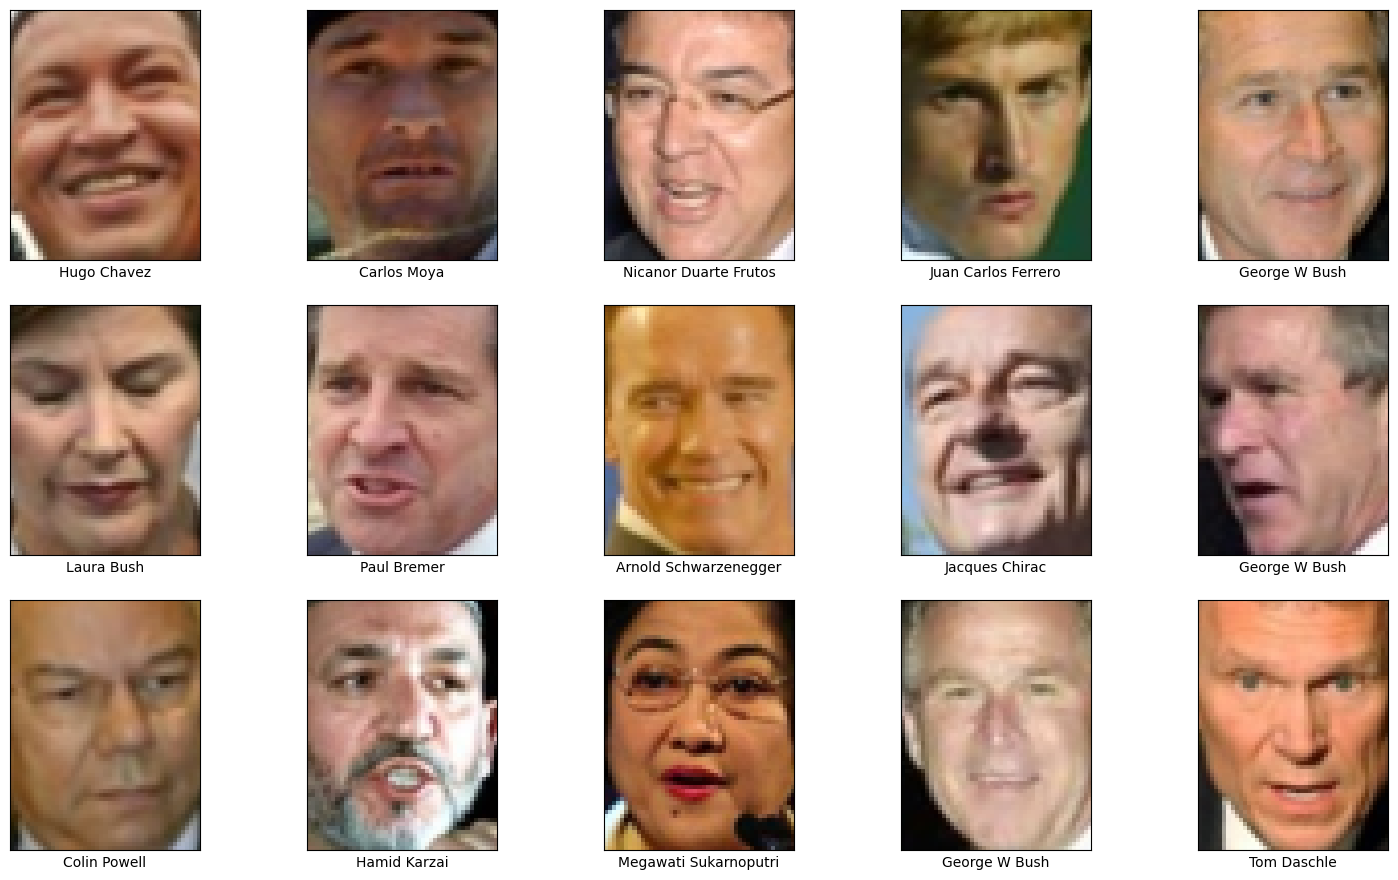

In [42]:
# Print statement to indicate the beginning of the data collection step.
print("1. Data Collection")

# Load the Labeled Faces in the Wild dataset, selecting only individuals with at least 10 images.
# 'color=True' means that images are loaded in RGB format (colored).
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Print the total number of unique labels (people) in the dataset.
print(f'Total Labels: {len(faces.target_names)}')

# Print the shape of the images data, which gives the total number of images and the image dimensions (height, width, channels).
print(f'Data dimension: {faces.images.shape}')

# Print the flattened shape of the images, where the 2D or 3D image array is flattened into a 1D array.
# This format is usually used for input into machine learning models.
print(f'Images flatten dimension: {faces.data.shape}')

# Visualize 15 random images from the dataset.
# Select 15 random indices from the dataset using np.random.randint.
rand_labels = np.random.randint(0, len(faces.data), 15)

# Create a 3x5 grid of subplots to display the 15 random images.
# Set the size of the figure to 15x9 inches.
fig, ax = plt.subplots(3, 5, figsize=(15, 9))

# Adjust layout to prevent overlap between subplots.
fig.tight_layout()

# Loop through each subplot to display a random image.
for i, axi in enumerate(ax.flat):
    # Display the image corresponding to the random index.
    axi.imshow(faces.images[rand_labels[i]])

    # Remove x and y axis ticks, and label each image with the name of the person.
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Display the figure with the plotted images.
plt.show()


Proses ini dimulai dengan memuat dataset gambar wajah dan memeriksa struktur data. Selanjutnya, kode memilih 15 gambar acak dari dataset dan menampilkannya dalam grid untuk mendapatkan visualisasi awal dataset yang sedang digunakan. Tujuannya adalah untuk memahami karakteristik visual dari data dan untuk memastikan bahwa gambar-gambar dalam dataset telah dimuat dengan benar.

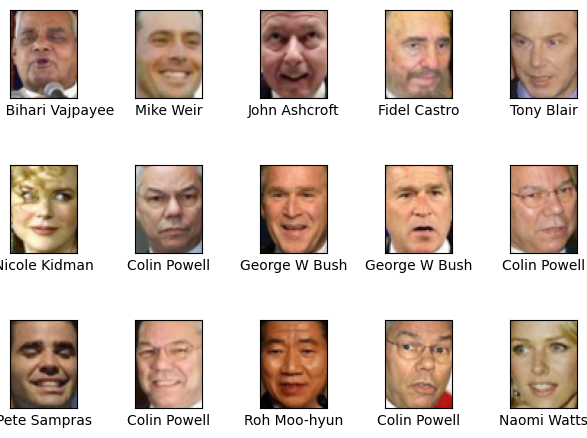

In [22]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''


2. Preprocessing


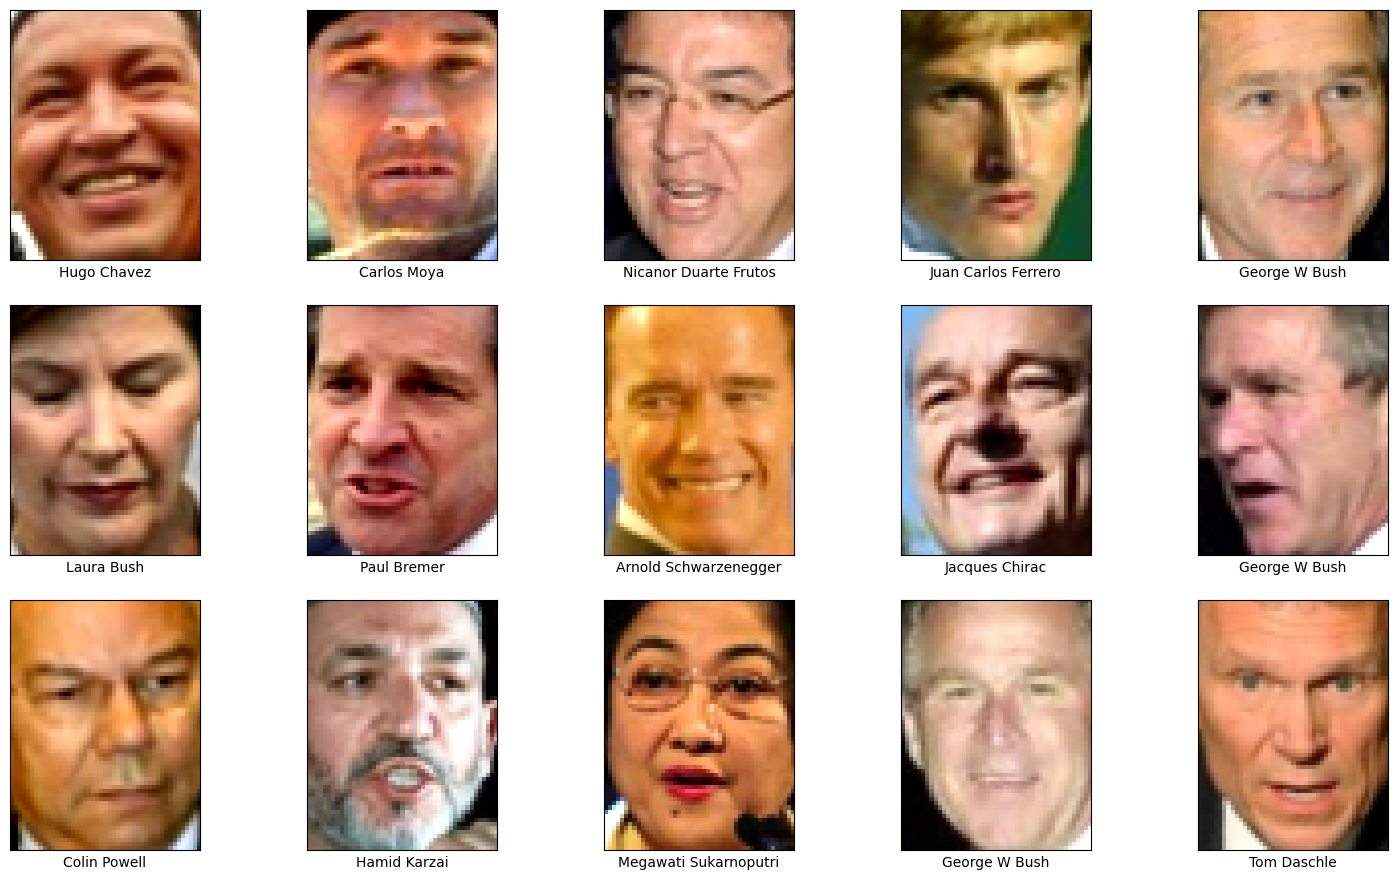

In [43]:
# Print statement to indicate the start of the preprocessing step.
print("\n2. Preprocessing")

# Define a function to preprocess each image.
def preprocess_image(image):
    # Normalize the pixel values to the range [0, 1] by dividing by 255 (the maximum value for RGB pixels).
    normalized = image / 255.0

    # Apply contrast stretching by adjusting the intensity levels of the image.
    # Percentile values at 2% and 98% are used for contrast stretching.
    p2, p98 = np.percentile(normalized, (2, 98))

    # Perform contrast stretching: rescale pixel values based on the percentiles.
    stretched = (normalized - p2) / (p98 - p2)

    # Ensure pixel values remain in the range [0, 1] after stretching (no values below 0 or above 1).
    stretched = np.clip(stretched, 0, 1)

    # Return the preprocessed image.
    return stretched

# Apply the preprocessing function to all images in the dataset using list comprehension.
# Each image in 'faces.images' is processed individually and stored in a new array 'preprocessed_images'.
preprocessed_images = np.array([preprocess_image(img) for img in faces.images])

# Visualize the preprocessed images, similar to the original visualization.
# Create a 3x5 grid of subplots to display 15 preprocessed images.
fig, ax = plt.subplots(3, 5, figsize=(15, 9))
fig.tight_layout()

# Loop through each subplot to display the preprocessed images.
for i, axi in enumerate(ax.flat):
    # Display the preprocessed image corresponding to the random index.
    axi.imshow(preprocessed_images[rand_labels[i]])

    # Remove x and y axis ticks, and label each image with the corresponding person's name.
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Show the figure with the preprocessed images.
plt.show()


Kode ini memproses dataset gambar wajah dengan melakukan normalisasi dan contrast stretching untuk meningkatkan kualitas gambar, khususnya untuk menyeimbangkan intensitas warna sehingga lebih optimal saat digunakan untuk pelatihan model. Gambar yang telah diproses kemudian divisualisasikan untuk memeriksa hasil preprocessing dan memastikan kualitas gambar lebih baik dibandingkan gambar asli sebelum diproses.

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

In [25]:
# Function Extract Histogram Features For Each Channel
def generate_hist(data, bins_num=5):
    hist_data = []

    for i in data:
        h_red = np.histogram(i[0][..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[1][..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[2][..., 2].ravel(), bins=bins_num)[0]

        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0) # Concat in row basis

        hist_data.append(h_concat)

    return np.array(hist_data)

In [26]:
# Extract histogram feature
hist_features = generate_hist(faces.images, bins_num=50)
hist_features.shape

(4324, 150)

In [44]:
# Print statement to indicate the start of the feature extraction step.
print("\n3. Feature Extraction")

# Define a function to extract histogram features from an image.
def extract_histogram_features(image, bins=32):
    features = []  # Initialize an empty list to store histogram features.

    # Loop through each color channel (R, G, B) of the image.
    for channel in range(3):  # RGB channels
        # Compute the histogram of the current channel with specified number of bins.
        hist, _ = np.histogram(image[:,:,channel], bins=bins, range=(0, 1))

        # Extend the features list with the computed histogram.
        features.extend(hist)

    # Return the features as a NumPy array.
    return np.array(features)

# Apply the feature extraction function to all preprocessed images.
histogram_features = np.array([extract_histogram_features(img) for img in preprocessed_images])

# Print the shape of the extracted histogram features.
print(f"Histogram features shape: {histogram_features.shape}")

# Import ndimage from scipy for edge detection.
from scipy import ndimage

# Define a function to extract edge features from an image using Sobel filters.
def extract_edge_features(image, sigma=1):
    # Compute the edges for each channel using Sobel filter and sum them.
    edges = np.sum([ndimage.sobel(image[:,:,i], axis=0)**2 +
                    ndimage.sobel(image[:,:,i], axis=1)**2
                    for i in range(3)], axis=0)

    # Create a histogram of the edge magnitudes with specified number of bins.
    edge_hist, _ = np.histogram(edges, bins=32)

    # Return the histogram of edge features.
    return edge_hist

# Apply the edge feature extraction function to all preprocessed images.
edge_features = np.array([extract_edge_features(img) for img in preprocessed_images])

# Print the shape of the extracted edge features.
print(f"Edge features shape: {edge_features.shape}")

# Combine histogram and edge features into a single feature array.
combined_features = np.hstack((histogram_features, edge_features))

# Print the shape of the combined features.
print(f"Combined features shape: {combined_features.shape}")



3. Feature Extraction
Histogram features shape: (4324, 96)
Edge features shape: (4324, 32)
Combined features shape: (4324, 128)


Proses ini bertujuan untuk mengekstrak fitur penting dari gambar wajah yang telah diproses untuk membantu dalam klasifikasi wajah. Histogram memberikan informasi tentang distribusi warna, sementara deteksi tepi membantu mengidentifikasi kontur dan struktur gambar. Dengan menggabungkan kedua fitur ini, model klasifikasi dapat menggunakan informasi yang lebih kaya dan komprehensif untuk membedakan antara berbagai wajah dalam dataset.

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

In [12]:
# Build a Model
X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

model = SVC()

model.fit(X_train, y_train)

SVC()

In [45]:
# Print statement to indicate the start of the model training step.
print("\n4. Model Training")

# Split the combined features and corresponding labels into training and testing sets.
# 20% of the data is reserved for testing, and stratification ensures the class distribution is preserved.
X_train, X_test, y_train, y_test = train_test_split(combined_features, faces.target,
                                                    test_size=0.2, random_state=42,
                                                    stratify=faces.target)

# Scale the features to have a mean of 0 and a standard deviation of 1 for better performance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data.
X_test_scaled = scaler.transform(X_test)        # Transform the test data based on training data.

# Train the Support Vector Machine (SVM) model with specified parameters.
model = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)  # Radial Basis Function kernel is used.
model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data and labels.



4. Model Training


SVC(C=10, random_state=42)

Proses ini berfokus pada pelatihan model klasifikasi menggunakan SVM untuk mengenali wajah berdasarkan fitur yang telah diekstrak sebelumnya. Dengan memisahkan data menjadi set pelatihan dan pengujian, menstandarkan fitur, dan melatih model SVM, langkah ini menetapkan dasar untuk evaluasi kinerja model pada data yang tidak terlihat (data pengujian) di langkah berikutnya. Tujuannya adalah untuk memastikan model dapat menggeneralisasi dengan baik dan memberikan hasil yang akurat dalam klasifikasi wajah.

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

In [35]:
# Evaluation
# Eval on Training
y_train_predict = model.predict(X_train_scaled) # Predict on scaled data
acc_train = accuracy_score(y_train, y_train_predict)

# Eval on Test
y_test_predict = model.predict(X_test_scaled) # Predict on scaled data
acc_test = accuracy_score(y_test, y_test_predict)

# Print
print(f'Accuracy on Train: {acc_train:.2%}')
print(f'Accuracy on Test: {acc_test:.2%}')

Accuracy on Train: 99.97%
Accuracy on Test: 15.61%


In [36]:
# Eval Classification Report
print(classification_report(y_test, y_test_predict, target_names=faces.target_names))

                           precision    recall  f1-score   support

             Abdullah Gul       0.25      0.25      0.25         4
             Adrien Brody       1.00      0.50      0.67         2
         Alejandro Toledo       0.17      0.12      0.14         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.20      0.14      0.17         7
             Andy Roddick       1.00      0.33      0.50         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.07      0.06      0.06        16
    Arnold Schwarzenegger       0.00      0.00      0.00         8
     Atal Bihari Vajpayee       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(113.92222222222219, 0.5, 'predicted label')

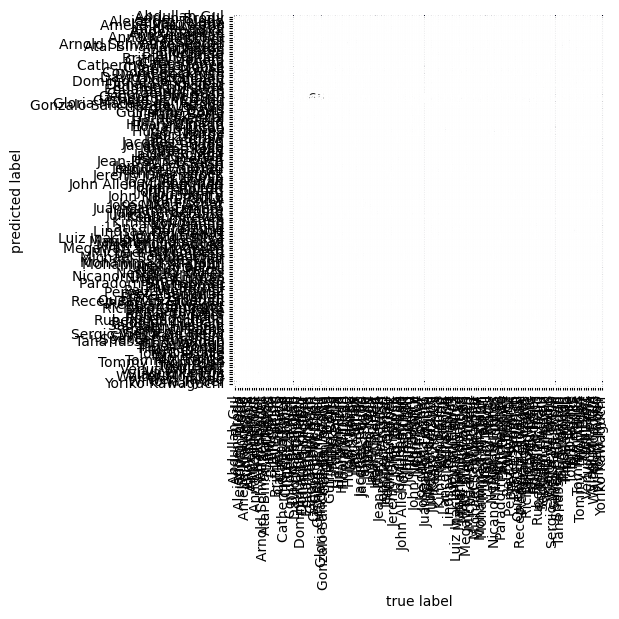

In [37]:
# Eval Confusion Matrix
# This is too large, we may not want it
mat = confusion_matrix(y_test, y_test_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')


5. Evaluation
Train Accuracy: 0.9997
Test Accuracy: 0.1561

Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       0.25      0.25      0.25         4
             Adrien Brody       1.00      0.50      0.67         2
         Alejandro Toledo       0.17      0.12      0.14         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.20      0.14      0.17         7
             Andy Roddick       1.00      0.33      0.50         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.07      0.06      0.06        16
    Arnold Schwarzenegger       0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


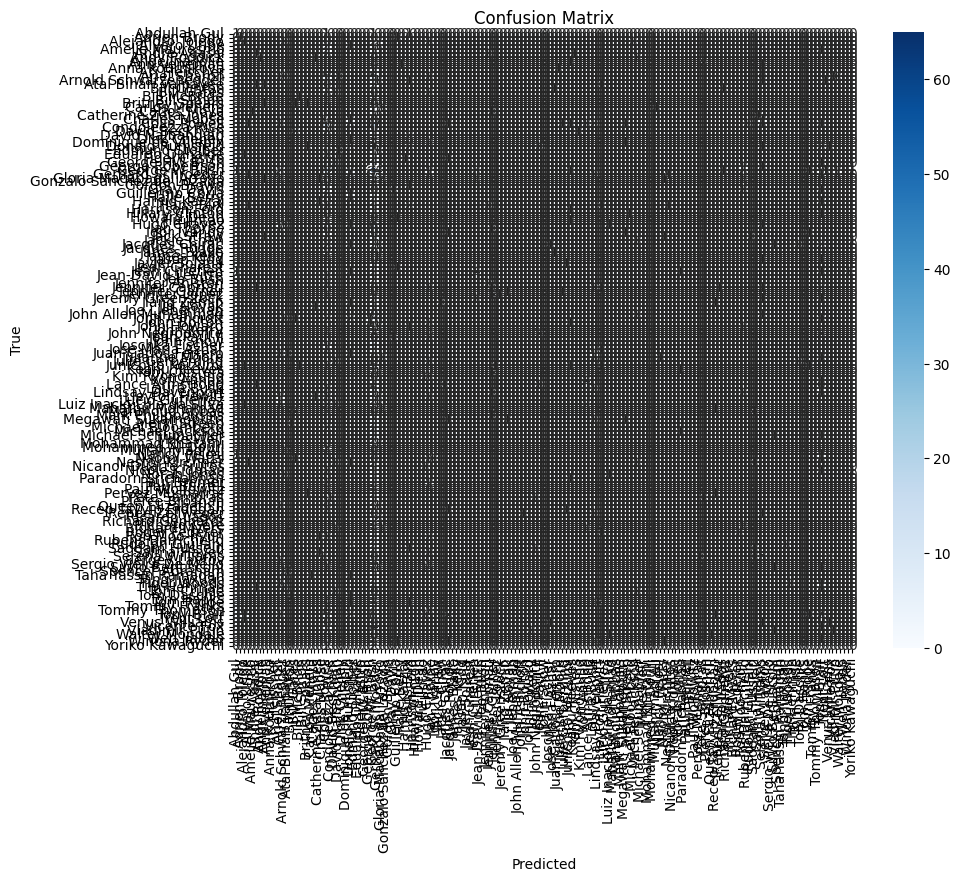

In [46]:
# Print statement to indicate the start of the evaluation step.
print("\n5. Evaluation")

# Make predictions on the scaled training and testing sets using the trained SVM model.
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy for both training and testing predictions.
train_accuracy = accuracy_score(y_train, y_train_pred)  # Accuracy on training set.
test_accuracy = accuracy_score(y_test, y_test_pred)      # Accuracy on testing set.

# Print the accuracy results.
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate a classification report to evaluate precision, recall, and F1-score for each class.
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=faces.target_names))

# Compute the confusion matrix to see the performance of the model in detail.
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using a heatmap for better visualization.
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Proses ini berfokus pada evaluasi performa model SVM setelah dilatih. Dengan memprediksi label, menghitung akurasi, dan menghasilkan laporan klasifikasi serta matriks kebingungan, langkah ini memberikan gambaran yang jelas tentang seberapa baik model dalam mengenali wajah berdasarkan fitur yang diekstrak. Evaluasi ini penting untuk menentukan efektivitas model dan area yang mungkin perlu ditingkatkan, serta memberikan wawasan tentang bagaimana model dapat dioptimalkan untuk hasil yang lebih baik.


Random Forest Results:
Train Accuracy: 1.0000
Test Accuracy: 0.1526

Random Forest Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         4
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.00      0.00      0.00         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.00      0.00      0.00         7
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.33      0.25      0.29         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.00      0.00      0.00        16
    Arnold Schwarzene

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


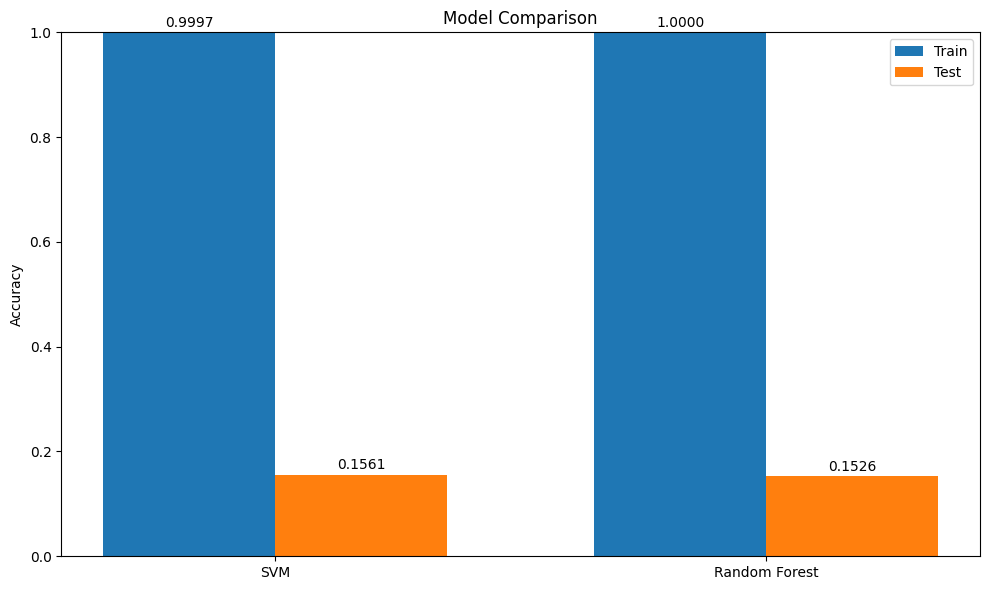

In [39]:
# Import RandomForestClassifier from sklearn.ensemble.
from sklearn.ensemble import RandomForestClassifier

# Create and configure the Random Forest model with 100 trees and a fixed random state for reproducibility.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model using the scaled training data and corresponding labels.
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled training and testing sets using the Random Forest model.
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy for both training and testing predictions for the Random Forest model.
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)  # Accuracy on training set.
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)      # Accuracy on testing set.

# Print the accuracy results for the Random Forest model.
print("\nRandom Forest Results:")
print(f"Train Accuracy: {rf_train_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")

# Generate a classification report for the Random Forest model to evaluate precision, recall, and F1-score for each class.
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_test_pred, target_names=faces.target_names))

# Compare SVM and Random Forest model performance.
models = ['SVM', 'Random Forest']
train_accuracies = [train_accuracy, rf_train_accuracy]  # Training accuracies of both models.
test_accuracies = [test_accuracy, rf_test_accuracy]      # Testing accuracies of both models.

# Create a bar plot to visualize the accuracy comparison between the two models.
plt.figure(figsize=(10, 6))
x = np.arange(len(models))  # Create an array for model indices.
width = 0.35  # Define the width of the bars.

# Plot training accuracies as bars.
plt.bar(x - width/2, train_accuracies, width, label='Train')
# Plot testing accuracies as bars.
plt.bar(x + width/2, test_accuracies, width, label='Test')

# Labeling and formatting the plot.
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(x, models)  # Set the x-ticks to the model names.
plt.legend()  # Display the legend.
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1.

# Annotate the training accuracy bars with their values.
for i, v in enumerate(train_accuracies):
    plt.text(i - width/2, v + 0.01, f'{v:.4f}', ha='center')
# Annotate the testing accuracy bars with their values.
for i, v in enumerate(test_accuracies):
    plt.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center')

# Adjust the layout of the plot.
plt.tight_layout()
# Show the plot.
plt.show()


Proses ini menambahkan model Random Forest ke dalam analisis, melatihnya, dan mengevaluasi kinerjanya menggunakan dataset yang sama dengan model SVM. Dengan mencetak akurasi dan laporan klasifikasi, serta membandingkan kedua model secara visual, langkah ini membantu dalam menentukan model mana yang lebih efektif untuk klasifikasi wajah berdasarkan fitur yang telah diekstrak. Pendekatan ini memberikan wawasan tentang kelebihan dan kekurangan masing-masing model, serta informasi yang berguna untuk pengambilan keputusan tentang pemodelan lebih lanjut.